In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r"D:\demo_data\9.random.csv", header=None)
df

,0,1,2
0,0.374,1.080,0.0
1,0.445,1.140,1.0
2,0.514,1.130,0.0
3,0.466,1.240,1.0
4,0.371,0.968,1.0
...,...,...,...
395,0.324,0.431,1.0
396,0.602,0.588,0.0
397,0.616,0.503,1.0
398,0.742,0.511,1.0


In [3]:
df.shape

(400, 3)

In [4]:
df[[0,1]]

,0,1
0,0.374,1.080
1,0.445,1.140
2,0.514,1.130
3,0.466,1.240
4,0.371,0.968
...,...,...
395,0.324,0.431
396,0.602,0.588
397,0.616,0.503
398,0.742,0.511


<AxesSubplot:xlabel='0', ylabel='1'>

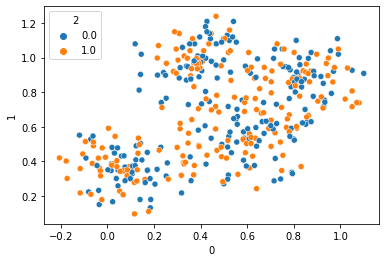

In [5]:
sns.scatterplot(x=df[0],y=df[1],hue=df[2],data=df)

In [6]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(df[[0,1]],df[2],test_size=0.2)

In [7]:
from sklearn.preprocessing import StandardScaler
std = StandardScaler()

In [8]:
x_train = std.fit_transform(x_train)
x_test = std.transform(x_test)

In [9]:
# Implement Neural Networks for classification task and decision boundary
import tensorflow
import tensorflow.keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout 

In [10]:

model = Sequential()
model.add(Dense(10,activation='relu', input_dim = 2,kernel_initializer = "he_normal"))

model.add(Dense(8,activation='relu',kernel_initializer = "he_normal"))

model.add(Dense(6,activation='relu',kernel_initializer = "he_normal"))

model.add(Dense(4,activation='relu',kernel_initializer = "he_normal"))

model.add(Dense(2,activation='relu',kernel_initializer = "he_normal"))
model.add(Dense(1,activation='sigmoid'))

In [11]:
model.compile(optimizer="Adam",loss="binary_crossentropy",metrics=["accuracy"])

In [12]:
save = model.fit(x_train, y_train, epochs = 400, validation_split= 0.2)

Epoch 1/400
8/8 [==============================] - 1s 28ms/step - loss: 0.6939 - accuracy: 0.4805 - val_loss: 0.6928 - val_accuracy: 0.4844
Epoch 2/400
8/8 [==============================] - 0s 6ms/step - loss: 0.6936 - accuracy: 0.4844 - val_loss: 0.6928 - val_accuracy: 0.5938
Epoch 3/400
8/8 [==============================] - 0s 6ms/step - loss: 0.6934 - accuracy: 0.4844 - val_loss: 0.6929 - val_accuracy: 0.5781
Epoch 4/400
8/8 [==============================] - 0s 6ms/step - loss: 0.6932 - accuracy: 0.4805 - val_loss: 0.6929 - val_accuracy: 0.5938
Epoch 5/400
8/8 [==============================] - 0s 5ms/step - loss: 0.6931 - accuracy: 0.4883 - val_loss: 0.6930 - val_accuracy: 0.5781
Epoch 6/400
8/8 [==============================] - 0s 5ms/step - loss: 0.6930 - accuracy: 0.5117 - val_loss: 0.6930 - val_accuracy: 0.5625
Epoch 7/400
8/8 [==============================] - 0s 6ms/step - loss: 0.6929 - accuracy: 0.5195 - val_loss: 0.6932 - val_accuracy: 0.5781
Epoch 8/400
8/8 [=========

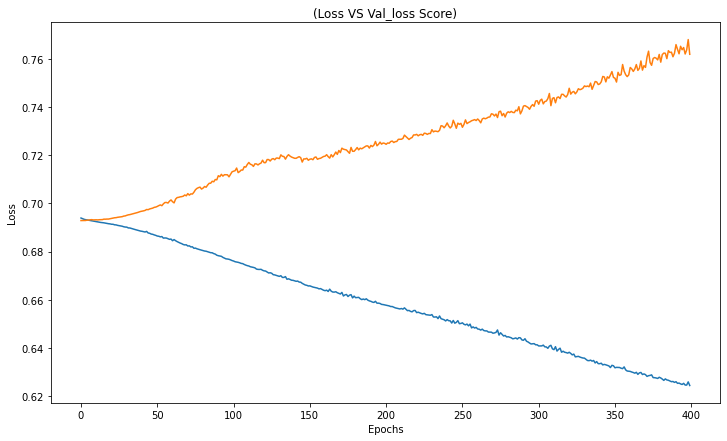

In [13]:
plt.figure(figsize=(12, 7))
plt.plot(save.history['loss'])
plt.plot(save.history['val_loss'])
plt.title("(Loss VS Val_loss Score)")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

In [14]:
y_pred=model.predict(x_test)

3/3 [==============================] - 0s 2ms/step


In [15]:
y_capf=np.where(y_pred>0.5,1,0)

In [16]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_capf)

0.425

3888/3888 [==============================] - 5s 1ms/step


<AxesSubplot:>

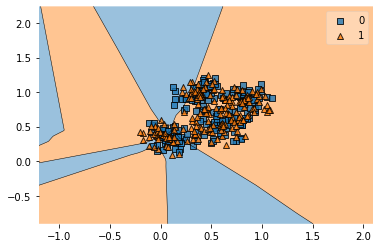

In [17]:
from mlxtend.plotting import plot_decision_regions

plot_decision_regions(df[[0,1]].values,df[2].values.astype(int),clf=model)

3888/3888 [==============================] - 5s 1ms/step


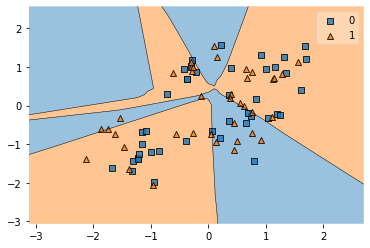

In [18]:
plot_decision_regions(x_test, y_test.values.astype(int), clf = model);